# Análisis estadístico de incendios forestales en Bogotá D.C.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import optree
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

# Análisis exploratorio

# Reporte de emergencias e incendios

In [2]:
emergencias2020 = pd.read_csv('../Bases de datos/emergencias2020.csv', index_col=0, sep=';', encoding='latin-1')
emergencias2022 = pd.read_csv('../Bases de datos/emergencias2022.csv', index_col=0, sep=';', encoding='latin-1')
emergencias2024 = pd.read_csv('../Bases de datos/emergencias2024.xls.csv', index_col=0, sep=';', encoding='latin-1')

emergencias = pd.concat([emergencias2020,emergencias2022,emergencias2024])

In [3]:
emergencias.isnull().sum()

Fecha reporte               0
Localidad              183805
Barrio                  97180
Upz                    207787
Dirección               18526
Tipo de afectación      10504
DirecciÃ³n             820972
Tipo de afectaciÃ³n    820972
dtype: int64

In [4]:
emergencias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831475 entries, 4385550 to 5418522
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Fecha reporte        831475 non-null  object
 1   Localidad            647670 non-null  object
 2   Barrio               734295 non-null  object
 3   Upz                  623688 non-null  object
 4   Dirección            812949 non-null  object
 5   Tipo de afectación   820971 non-null  object
 6   DirecciÃ³n           10503 non-null   object
 7   Tipo de afectaciÃ³n  10503 non-null   object
dtypes: object(8)
memory usage: 57.1+ MB


In [5]:
emergencias.describe()

,Fecha reporte,Localidad,Barrio,Upz,Dirección,Tipo de afectación,DirecciÃ³n,Tipo de afectaciÃ³n
count,831475,647670,734295,623688,812949,820971,10503,10503
unique,2027,27,7658,201,308984,132,9759,78
top,19/12/2018,11 Suba,SAN JOSE,28 - EL RINCON,AV BOYACA,Accidente de tránsito,CL 20 68A 06,DaÃ±o en redes de servicio pÃºblicos energÃ­a
freq,3608,74334,3870,16790,3498,436940,17,1166


In [6]:
emergencias.dropna(subset = ['Tipo de afectación'], inplace = True)
emergencias.drop(['DirecciÃ³n','Tipo de afectaciÃ³n'], axis = 1, inplace = True)
emergencias

,Fecha reporte,Localidad,Barrio,Upz,Dirección,Tipo de afectación
4385550,1/01/2017,9 FontibÃ³n,EL PORVENIR,77 - ZONA FRANCA,KR 123 13B 04,Enfermedad o Traumatismo
4385549,1/01/2017,11 Suba,VILLA CINDY,71 - TIBABUYES,CL 138B 157 84,Enfermedad o Traumatismo
4385548,1/01/2017,8 Kennedy,SUPER MANZANA 9A,47 - KENNEDY CENTRAL,KR 78N 26 SUR,Enfermedad o Traumatismo
4385547,1/01/2017,18 Rafael Uribe Uribe,QUIROGA SUR,39 - QUIROGA,KR 21 40A SUR 07,Enfermedad o Traumatismo
4385541,1/01/2017,10 Engativa,LOS CEREZOS,29 - MINUTO DE DIOS,KR 89A 93 32,Quemas
...,...,...,...,...,...,...
5390682,30/01/2022,14 Los MÃ¡rtires,LA FAVORITA,102 - LA SABANA,CL 19A 16 23,Daño en redes de servicio públicos energía
5390681,30/01/2022,12 Barrios Unidos,LA AURORA,98 - LOS ALCAZARES,AK 24 74A 7,Daño en redes de servicio públicos energía
5390680,30/01/2022,2 Chapinero,EMAUS,88 - EL REFUGIO,CL 70 6 43,Daño en redes de servicio públicos gas
5390679,30/01/2022,10 Engativa,CENTRO ENGATIVA,74 - ENGATIVA,CL 70A BIS 117A 0,Quemas


In [7]:
emergencias.groupby('Tipo de afectación').count()

,Fecha reporte,Localidad,Barrio,Upz,Dirección
Tipo de afectación,,,,,
Abejas,8453,7866,8250,7656,8417
Abejas - Ataque de Abejas a Personas,7,6,6,6,7
Abejas - Existencia de Panales o Colmenas de Abejas,34,34,34,30,34
Accidente Aéreo,3,3,3,1,1
Accidente Aéreo - Aeronave en Tierra,5,5,5,3,3
...,...,...,...,...,...
Riesgo de colapso estructural,1101,1084,1091,1009,1085
Riesgo de colapso estructural - Colapso de estructura,104,104,103,95,101
Riesgo de colapso estructural - Edificación en Riesgo de colapso estructural,15,15,15,13,15


In [8]:
df1 = emergencias[emergencias['Tipo de afectación'] == 'Quemas']
df2 = emergencias[emergencias['Tipo de afectación'].str.contains('Incendio')]
Incendios = pd.concat([df1,df2])
Incendios

,Fecha reporte,Localidad,Barrio,Upz,Dirección,Tipo de afectación
4385541,1/01/2017,10 Engativa,LOS CEREZOS,29 - MINUTO DE DIOS,KR 89A 93 32,Quemas
4385188,1/01/2017,12 Barrios Unidos,POLO CLUB,98 - LOS ALCAZARES,CL 80 29,Quemas
4385184,1/01/2017,12 Barrios Unidos,SANTA SOFIA,98 - LOS ALCAZARES,CL 79 29B,Quemas
4384674,1/01/2017,9 FontibÃ³n,CENTENARIO,75 - FONTIBON,KR 100 16A 16,Quemas
4384617,1/01/2017,18 Rafael Uribe Uribe,GUSTAVO RESTREPO,36 - SAN JOSE,KR 13A 30 SUR 15,Quemas
...,...,...,...,...,...,...
5390662,29/01/2022,5 Usme,EL UVAL,NaN,CL 115 SUR 5 ESTE,Incendio Forestal
5390693,30/01/2022,19 Ciudad BolÃ­var,SOACHA - CUNDINAMARCA,1 Paseo de los Libertadores,SOACHA - CUNDINAMARCA,Incendio Estructuras
5390692,30/01/2022,7 Bosa,EL CORZO,86 - EL PORVENIR,CL 55 SUR 98C 20,Incendio Estructuras
5390690,30/01/2022,5 Usme,A.J. SUCRE II,58 - COMUNEROS,KR 14 108 SUR 0,Conato de Incendio Forestal


In [9]:
em_lo = emergencias.groupby('Localidad').count()
em_lo.sort_values('Tipo de afectación', inplace = True)
em_lo

,Fecha reporte,Barrio,Upz,Dirección,Tipo de afectación
Localidad,,,,,
Distrito Capital,1,1,0,0,1
20 Sumapaz,66,58,1,52,66
14 Los Martires,146,126,0,126,146
15 Antonio Nariño,165,137,0,137,165
4 San Cristobal,464,425,5,394,464
9 Fontibon,669,529,5,547,669
1 Usaquen,772,603,7,644,772
19 Ciudad Bolivar,1217,1078,7,1032,1217
17 La Candelaria,4544,4527,4485,4478,4544


In [10]:
Incendios_loc = Incendios.groupby('Localidad').count()
Incendios_loc.sort_values('Tipo de afectación', inplace = True)

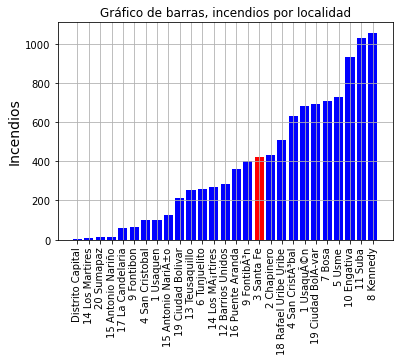

In [11]:
colors = ['red' if category == '3 Santa Fe' else 'blue' for category in Incendios_loc.index]
plt.bar(Incendios_loc.index, Incendios_loc['Tipo de afectación'], color = colors)
plt.xticks(rotation='vertical')
plt.ylabel('Incendios', fontsize=14)
plt.title('Gráfico de barras, incendios por localidad')
plt.grid(True)
plt.show()

In [12]:
Incendios['Tipo de afectación'].describe()

count      11228
unique        11
top       Quemas
freq        5255
Name: Tipo de afectación, dtype: object

Text(0.5, 1.0, 'Reporte de incendios por día')

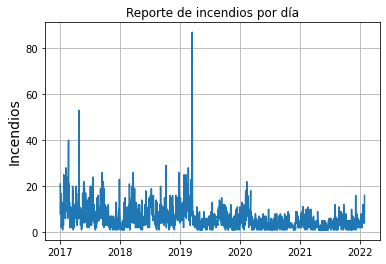

In [13]:
Incendios['Fecha reporte']= pd.to_datetime(Incendios['Fecha reporte'], format='%d/%m/%Y')
Incendios_fecha = Incendios.groupby('Fecha reporte').count()
plt.plot(Incendios_fecha.index, Incendios_fecha['Tipo de afectación'])
plt.ylabel('Incendios', fontsize=14)
plt.grid(True)
plt.title('Reporte de incendios por día')

In [14]:
Incendios_fecha['Tipo de afectación'].describe()

count    1764.000000
mean        6.365079
std         5.270606
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        87.000000
Name: Tipo de afectación, dtype: float64

# Medidas ambientales en Bogotá

In [15]:
cambio = pd.read_csv('../Bases de datos/cambio_climatico.csv', index_col=0, sep=';', encoding='latin-1')
cambio

,Mes,Fecha,Dengue,ENOS C,ENOS,Añomes,No. Mes,Temperatura Máxima,Temperatura mínima,Temperatura promedio,...,Lluvia Acumulada,Temporada *,Casos ESI-IRAG,FRM,Familias Afectadas,Inundaciones,Encharcamiento,Damnificados inundaciones,Damnificados encharcamientos,Clasificación ONI
Año,,,,,,,,,,,,,,,,,,,,,
2009,Ene,"jueves, 1 de enero de 2009",127,Niña,-0.8,2009Ene,1,23.5,4.0,14.05,...,476.9,Lluvioso,55,5,0,1,5,0,0,NIÑA DÉBIL
2009,Feb,"domingo, 1 de febrero de 2009",36,Niña,-0.7,2009Feb,2,23.8,5.1,14.22,...,796.7,Lluvioso,74,21,47,4,61,60,1,NIÑA DÉBIL
2009,Mar,"domingo, 1 de marzo de 2009",26,Niña,-0.5,2009Mar,3,23.7,7.3,14.32,...,1092.3,Lluvioso,149,7,5,4,35,7,2,NIÑA DÉBIL
2009,Abr,"miércoles, 1 de abril de 2009",52,Neutro,-0.2,2009Abr,4,24.4,5.7,14.71,...,686.0,Lluvioso,303,39,64,2,25,0,5,NEUTRO
2009,May,"viernes, 1 de mayo de 2009",37,Neutro,0.1,2009May,5,22.8,5.4,14.58,...,243.4,Menos lluvioso,264,4,109,1,7,2,0,NEUTRO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,Feb,"miércoles, 1 de febrero de 2023",11,Neutro,"-0,4",2023Feb,170,27.3,2.0,14.80,...,531.6,Menos lluvioso,285,13,14,0,7,0,7,NIÑA DÉBIL
2023,Mar,"miércoles, 1 de marzo de 2023",11,Neutro,"-0,1",2023Mar,171,26.3,7.0,15.00,...,1573.4,Lluvioso,391,71,89,0,37,0,1366,NIÑA DÉBIL
2023,Abr,"sábado, 1 de abril de 2023",7,Neutro,"0,2",2023Abr,172,26.1,6.7,15.20,...,1154.8,Lluvioso,455,16,10,0,7,0,0,NIÑA DÉBIL


In [16]:
cambio.describe()

,Dengue,No. Mes,Temperatura Máxima,Temperatura mínima,Temperatura promedio,Casos leptospirosis,Lluvia Acumulada,Casos ESI-IRAG,FRM,Familias Afectadas,Inundaciones,Encharcamiento,Damnificados inundaciones,Damnificados encharcamientos
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,116.557471,87.500000,25.039655,5.387931,14.570690,3.988506,756.237356,197.557471,19.752874,47.045977,1.787356,23.086207,10.218391,147.557471
std,149.386973,50.373604,1.654485,1.526007,0.496177,4.118180,493.544860,466.155764,35.828620,128.769266,5.287750,52.717137,85.343160,1620.815378
min,6.000000,1.000000,21.300000,0.400000,13.590000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,44.250000,24.000000,4.300000,14.262500,1.000000,370.925000,59.250000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,64.000000,87.500000,24.900000,5.400000,14.510000,3.000000,672.900000,100.000000,7.000000,6.500000,0.000000,7.000000,0.000000,0.000000
75%,133.000000,130.750000,26.200000,6.500000,14.850000,6.000000,1047.750000,188.000000,19.000000,28.500000,1.000000,26.750000,0.000000,5.750000
max,1101.000000,174.000000,29.700000,9.100000,16.190000,25.000000,2413.200000,5063.000000,236.000000,915.000000,55.000000,498.000000,1099.000000,21344.000000


In [17]:
cambio.columns

Index(['Mes', 'Fecha', 'Dengue', 'ENOS C', 'ENOS', 'Añomes', 'No. Mes',
       'Temperatura Máxima', 'Temperatura mínima', 'Temperatura promedio',
       'Casos leptospirosis', 'Lluvia Acumulada', 'Temporada *',
       'Casos ESI-IRAG', 'FRM', 'Familias Afectadas', 'Inundaciones',
       'Encharcamiento', 'Damnificados inundaciones',
       'Damnificados encharcamientos', 'Clasificación ONI'],
      dtype='object')

In [18]:
cambio.drop(['Dengue', 'Casos leptospirosis', 'Añomes', 'No. Mes','Casos ESI-IRAG','Inundaciones','Familias Afectadas','Encharcamiento','Damnificados inundaciones',
       'Damnificados encharcamientos'], axis= 1, inplace = True)
cambio

,Mes,Fecha,ENOS C,ENOS,Temperatura Máxima,Temperatura mínima,Temperatura promedio,Lluvia Acumulada,Temporada *,FRM,Clasificación ONI
Año,,,,,,,,,,,
2009,Ene,"jueves, 1 de enero de 2009",Niña,-0.8,23.5,4.0,14.05,476.9,Lluvioso,5,NIÑA DÉBIL
2009,Feb,"domingo, 1 de febrero de 2009",Niña,-0.7,23.8,5.1,14.22,796.7,Lluvioso,21,NIÑA DÉBIL
2009,Mar,"domingo, 1 de marzo de 2009",Niña,-0.5,23.7,7.3,14.32,1092.3,Lluvioso,7,NIÑA DÉBIL
2009,Abr,"miércoles, 1 de abril de 2009",Neutro,-0.2,24.4,5.7,14.71,686.0,Lluvioso,39,NEUTRO
2009,May,"viernes, 1 de mayo de 2009",Neutro,0.1,22.8,5.4,14.58,243.4,Menos lluvioso,4,NEUTRO
...,...,...,...,...,...,...,...,...,...,...,...
2023,Feb,"miércoles, 1 de febrero de 2023",Neutro,"-0,4",27.3,2.0,14.80,531.6,Menos lluvioso,13,NIÑA DÉBIL
2023,Mar,"miércoles, 1 de marzo de 2023",Neutro,"-0,1",26.3,7.0,15.00,1573.4,Lluvioso,71,NIÑA DÉBIL
2023,Abr,"sábado, 1 de abril de 2023",Neutro,"0,2",26.1,6.7,15.20,1154.8,Lluvioso,16,NIÑA DÉBIL


In [19]:
from locale import setlocale, LC_TIME
setlocale(LC_TIME, 'es_ES')
format_string = "%A, %d de %B de %Y"
cambio['Fecha'] = pd.to_datetime(cambio['Fecha'], format=format_string)

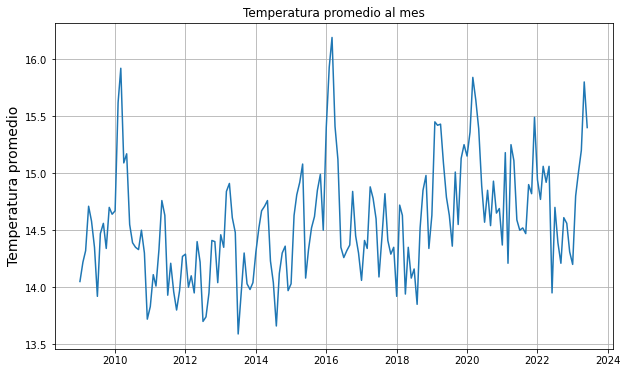

In [20]:
plt.figure(figsize = (10,6))
plt.ylabel('Temperatura promedio', fontsize=14)
plt.plot(cambio['Fecha'],cambio['Temperatura promedio'])
plt.title('Temperatura promedio al mes')
plt.grid(True)

In [21]:
cambio['ENOS'] = pd.to_numeric(cambio['ENOS'].str.replace(',', '.'), errors='coerce')

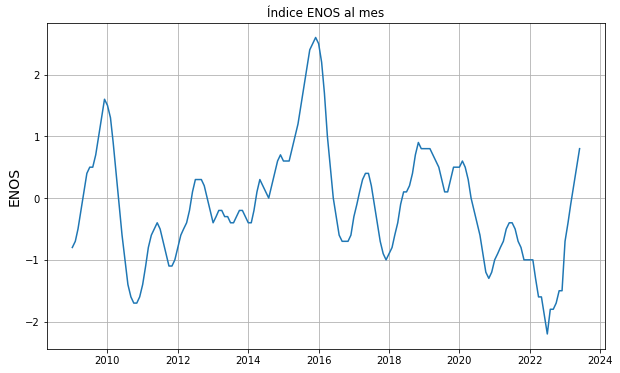

In [22]:
plt.figure(figsize = (10,6))
plt.plot(cambio['Fecha'],cambio['ENOS'])
plt.ylabel('ENOS', fontsize=14)
plt.title('Índice ENOS al mes')
plt.grid(True)

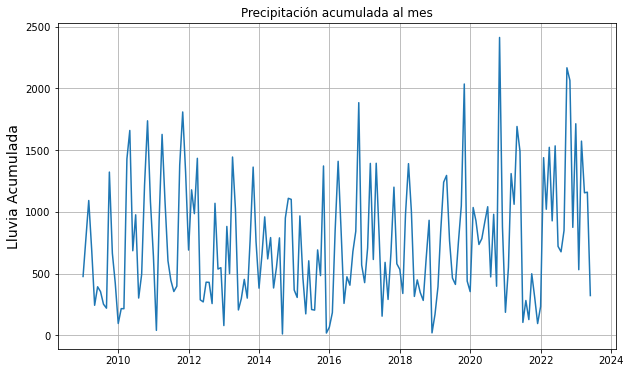

In [23]:
plt.figure(figsize = (10,6))
plt.ylabel('Lluvia Acumulada', fontsize=14)
plt.plot(cambio['Fecha'],cambio['Lluvia Acumulada'])
plt.title('Precipitación acumulada al mes')
plt.grid(True)

In [24]:
cambio['Lluvia Acumulada'].describe()

count     174.000000
mean      756.237356
std       493.544860
min        11.000000
25%       370.925000
50%       672.900000
75%      1047.750000
max      2413.200000
Name: Lluvia Acumulada, dtype: float64

In [25]:
max(cambio['Lluvia Acumulada'])- min(cambio['Lluvia Acumulada'])

2402.2

# Preprocesamiento de los datos

In [26]:
cambio['Fecha'] = pd.to_datetime(cambio['Fecha'], format='%A, %d de %B de %Y')

In [27]:
cambio['Fecha'].describe(datetime_is_numeric=True)

count                              174
mean     2016-03-16 18:20:41.379310336
min                2009-01-01 00:00:00
25%                2012-08-08 18:00:00
50%                2016-03-16 12:00:00
75%                2019-10-24 06:00:00
max                2023-06-01 00:00:00
Name: Fecha, dtype: object

In [28]:
Incendios['Fecha reporte'].describe(datetime_is_numeric=True)

count                            11228
mean     2019-01-09 10:15:20.840755200
min                2017-01-01 00:00:00
25%                2017-10-01 00:00:00
50%                2018-11-17 00:00:00
75%                2020-01-20 00:00:00
max                2022-01-30 00:00:00
Name: Fecha reporte, dtype: object

In [29]:
# Agregar una columna con el primer día del mes correspondiente
Incendios['Mes'] = Incendios['Fecha reporte'].dt.to_period('M').dt.to_timestamp()
Incendios

,Fecha reporte,Localidad,Barrio,Upz,Dirección,Tipo de afectación,Mes
4385541,2017-01-01,10 Engativa,LOS CEREZOS,29 - MINUTO DE DIOS,KR 89A 93 32,Quemas,2017-01-01
4385188,2017-01-01,12 Barrios Unidos,POLO CLUB,98 - LOS ALCAZARES,CL 80 29,Quemas,2017-01-01
4385184,2017-01-01,12 Barrios Unidos,SANTA SOFIA,98 - LOS ALCAZARES,CL 79 29B,Quemas,2017-01-01
4384674,2017-01-01,9 FontibÃ³n,CENTENARIO,75 - FONTIBON,KR 100 16A 16,Quemas,2017-01-01
4384617,2017-01-01,18 Rafael Uribe Uribe,GUSTAVO RESTREPO,36 - SAN JOSE,KR 13A 30 SUR 15,Quemas,2017-01-01
...,...,...,...,...,...,...,...
5390662,2022-01-29,5 Usme,EL UVAL,NaN,CL 115 SUR 5 ESTE,Incendio Forestal,2022-01-01
5390693,2022-01-30,19 Ciudad BolÃ­var,SOACHA - CUNDINAMARCA,1 Paseo de los Libertadores,SOACHA - CUNDINAMARCA,Incendio Estructuras,2022-01-01
5390692,2022-01-30,7 Bosa,EL CORZO,86 - EL PORVENIR,CL 55 SUR 98C 20,Incendio Estructuras,2022-01-01
5390690,2022-01-30,5 Usme,A.J. SUCRE II,58 - COMUNEROS,KR 14 108 SUR 0,Conato de Incendio Forestal,2022-01-01


In [30]:
# Realizar la unión por la izquierda utilizando la nueva columna 'Mes'
merged_df = pd.merge(Incendios, cambio, left_on='Mes', right_on='Fecha', how='outer')
merged_df.head(40)

,Fecha reporte,Localidad,Barrio,Upz,Dirección,Tipo de afectación,Mes_x,Mes_y,Fecha,ENOS C,ENOS,Temperatura Máxima,Temperatura mínima,Temperatura promedio,Lluvia Acumulada,Temporada *,FRM,Clasificación ONI
0,2017-01-01,10 Engativa,LOS CEREZOS,29 - MINUTO DE DIOS,KR 89A 93 32,Quemas,2017-01-01,Ene,2017-01-01,Neutro,-0.3,24.4,2.2,14.06,427.0,Menos lluvioso,1,NEUTRO
1,2017-01-01,12 Barrios Unidos,POLO CLUB,98 - LOS ALCAZARES,CL 80 29,Quemas,2017-01-01,Ene,2017-01-01,Neutro,-0.3,24.4,2.2,14.06,427.0,Menos lluvioso,1,NEUTRO
2,2017-01-01,12 Barrios Unidos,SANTA SOFIA,98 - LOS ALCAZARES,CL 79 29B,Quemas,2017-01-01,Ene,2017-01-01,Neutro,-0.3,24.4,2.2,14.06,427.0,Menos lluvioso,1,NEUTRO
3,2017-01-01,9 FontibÃ³n,CENTENARIO,75 - FONTIBON,KR 100 16A 16,Quemas,2017-01-01,Ene,2017-01-01,Neutro,-0.3,24.4,2.2,14.06,427.0,Menos lluvioso,1,NEUTRO
4,2017-01-01,18 Rafael Uribe Uribe,GUSTAVO RESTREPO,36 - SAN JOSE,KR 13A 30 SUR 15,Quemas,2017-01-01,Ene,2017-01-01,Neutro,-0.3,24.4,2.2,14.06,427.0,Menos lluvioso,1,NEUTRO
5,2017-01-01,8 Kennedy,SUPER MANZANA 8,47 - KENNEDY CENTRAL,CL 40B SUR 78B 69,Quemas,2017-01-01,Ene,2017-01-01,Neutro,-0.3,24.4,2.2,14.06,427.0,Menos lluvioso,1,NEUTRO
6,2017-01-01,11 Suba,MAZUREN,19 - EL PRADO,KR 53A 150A 49,Quemas,2017-01-01,Ene,2017-01-01,Neutro,-0.3,24.4,2.2,14.06,427.0,Menos lluvioso,1,NEUTRO
7,2017-01-01,NaN,EL NUEVO PORTAL,NaN,DG 97 SUR 6F ESTE 33,Quemas,2017-01-01,Ene,2017-01-01,Neutro,-0.3,24.4,2.2,14.06,427.0,Menos lluvioso,1,NEUTRO
8,2017-01-02,NaN,NaN,NaN,AV PRIMERO DE MAYO AV VILLAVICENCIO,Quemas,2017-01-01,Ene,2017-01-01,Neutro,-0.3,24.4,2.2,14.06,427.0,Menos lluvioso,1,NEUTRO
9,2017-01-03,NaN,NaN,NaN,AV AMERICAS 80,Quemas,2017-01-01,Ene,2017-01-01,Neutro,-0.3,24.4,2.2,14.06,427.0,Menos lluvioso,1,NEUTRO


In [31]:
merged_df[merged_df['Mes_x'] == merged_df['Fecha']]

,Fecha reporte,Localidad,Barrio,Upz,Dirección,Tipo de afectación,Mes_x,Mes_y,Fecha,ENOS C,ENOS,Temperatura Máxima,Temperatura mínima,Temperatura promedio,Lluvia Acumulada,Temporada *,FRM,Clasificación ONI
0,2017-01-01,10 Engativa,LOS CEREZOS,29 - MINUTO DE DIOS,KR 89A 93 32,Quemas,2017-01-01,Ene,2017-01-01,Neutro,-0.3,24.4,2.2,14.06,427.0,Menos lluvioso,1,NEUTRO
1,2017-01-01,12 Barrios Unidos,POLO CLUB,98 - LOS ALCAZARES,CL 80 29,Quemas,2017-01-01,Ene,2017-01-01,Neutro,-0.3,24.4,2.2,14.06,427.0,Menos lluvioso,1,NEUTRO
2,2017-01-01,12 Barrios Unidos,SANTA SOFIA,98 - LOS ALCAZARES,CL 79 29B,Quemas,2017-01-01,Ene,2017-01-01,Neutro,-0.3,24.4,2.2,14.06,427.0,Menos lluvioso,1,NEUTRO
3,2017-01-01,9 FontibÃ³n,CENTENARIO,75 - FONTIBON,KR 100 16A 16,Quemas,2017-01-01,Ene,2017-01-01,Neutro,-0.3,24.4,2.2,14.06,427.0,Menos lluvioso,1,NEUTRO
4,2017-01-01,18 Rafael Uribe Uribe,GUSTAVO RESTREPO,36 - SAN JOSE,KR 13A 30 SUR 15,Quemas,2017-01-01,Ene,2017-01-01,Neutro,-0.3,24.4,2.2,14.06,427.0,Menos lluvioso,1,NEUTRO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11223,2022-01-29,5 Usme,EL UVAL,NaN,CL 115 SUR 5 ESTE,Incendio Forestal,2022-01-01,Ene,2022-01-01,Niña,-1.0,26.4,3.5,14.94,233.6,Lluvioso,1,NIÑA MODERADO
11224,2022-01-30,19 Ciudad BolÃ­var,SOACHA - CUNDINAMARCA,1 Paseo de los Libertadores,SOACHA - CUNDINAMARCA,Incendio Estructuras,2022-01-01,Ene,2022-01-01,Niña,-1.0,26.4,3.5,14.94,233.6,Lluvioso,1,NIÑA MODERADO
11225,2022-01-30,7 Bosa,EL CORZO,86 - EL PORVENIR,CL 55 SUR 98C 20,Incendio Estructuras,2022-01-01,Ene,2022-01-01,Niña,-1.0,26.4,3.5,14.94,233.6,Lluvioso,1,NIÑA MODERADO
11226,2022-01-30,5 Usme,A.J. SUCRE II,58 - COMUNEROS,KR 14 108 SUR 0,Conato de Incendio Forestal,2022-01-01,Ene,2022-01-01,Niña,-1.0,26.4,3.5,14.94,233.6,Lluvioso,1,NIÑA MODERADO


In [32]:
print(min(merged_df['Fecha reporte']))
print(max(merged_df['Fecha reporte']))

2017-01-01 00:00:00
2022-01-30 00:00:00


In [33]:
print(min(merged_df['Fecha']))
print(max((merged_df['Fecha reporte'])))

2009-01-01 00:00:00
2022-01-30 00:00:00


In [34]:
# Filtrar y eliminar filas donde 'Fecha' está dentro del rango de fechas en 'Fecha reporte'
filtered_df = merged_df[(merged_df['Fecha'] >= min(merged_df['Fecha reporte'])) & (merged_df['Fecha'] <= max(merged_df['Fecha reporte']))]
filtered_df

,Fecha reporte,Localidad,Barrio,Upz,Dirección,Tipo de afectación,Mes_x,Mes_y,Fecha,ENOS C,ENOS,Temperatura Máxima,Temperatura mínima,Temperatura promedio,Lluvia Acumulada,Temporada *,FRM,Clasificación ONI
0,2017-01-01,10 Engativa,LOS CEREZOS,29 - MINUTO DE DIOS,KR 89A 93 32,Quemas,2017-01-01,Ene,2017-01-01,Neutro,-0.3,24.4,2.2,14.06,427.0,Menos lluvioso,1,NEUTRO
1,2017-01-01,12 Barrios Unidos,POLO CLUB,98 - LOS ALCAZARES,CL 80 29,Quemas,2017-01-01,Ene,2017-01-01,Neutro,-0.3,24.4,2.2,14.06,427.0,Menos lluvioso,1,NEUTRO
2,2017-01-01,12 Barrios Unidos,SANTA SOFIA,98 - LOS ALCAZARES,CL 79 29B,Quemas,2017-01-01,Ene,2017-01-01,Neutro,-0.3,24.4,2.2,14.06,427.0,Menos lluvioso,1,NEUTRO
3,2017-01-01,9 FontibÃ³n,CENTENARIO,75 - FONTIBON,KR 100 16A 16,Quemas,2017-01-01,Ene,2017-01-01,Neutro,-0.3,24.4,2.2,14.06,427.0,Menos lluvioso,1,NEUTRO
4,2017-01-01,18 Rafael Uribe Uribe,GUSTAVO RESTREPO,36 - SAN JOSE,KR 13A 30 SUR 15,Quemas,2017-01-01,Ene,2017-01-01,Neutro,-0.3,24.4,2.2,14.06,427.0,Menos lluvioso,1,NEUTRO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11223,2022-01-29,5 Usme,EL UVAL,NaN,CL 115 SUR 5 ESTE,Incendio Forestal,2022-01-01,Ene,2022-01-01,Niña,-1.0,26.4,3.5,14.94,233.6,Lluvioso,1,NIÑA MODERADO
11224,2022-01-30,19 Ciudad BolÃ­var,SOACHA - CUNDINAMARCA,1 Paseo de los Libertadores,SOACHA - CUNDINAMARCA,Incendio Estructuras,2022-01-01,Ene,2022-01-01,Niña,-1.0,26.4,3.5,14.94,233.6,Lluvioso,1,NIÑA MODERADO
11225,2022-01-30,7 Bosa,EL CORZO,86 - EL PORVENIR,CL 55 SUR 98C 20,Incendio Estructuras,2022-01-01,Ene,2022-01-01,Niña,-1.0,26.4,3.5,14.94,233.6,Lluvioso,1,NIÑA MODERADO
11226,2022-01-30,5 Usme,A.J. SUCRE II,58 - COMUNEROS,KR 14 108 SUR 0,Conato de Incendio Forestal,2022-01-01,Ene,2022-01-01,Niña,-1.0,26.4,3.5,14.94,233.6,Lluvioso,1,NIÑA MODERADO


In [35]:
merged_df[merged_df['Fecha reporte'].isnull() & merged_df['Fecha'].isnull()].count()

Fecha reporte           0
Localidad               0
Barrio                  0
Upz                     0
Dirección               0
Tipo de afectación      0
Mes_x                   0
Mes_y                   0
Fecha                   0
ENOS C                  0
ENOS                    0
Temperatura Máxima      0
Temperatura mínima      0
Temperatura promedio    0
Lluvia Acumulada        0
Temporada *             0
FRM                     0
Clasificación ONI       0
dtype: int64

In [36]:
merged_df = merged_df.dropna(how='all')

In [37]:
merged_df['Tipo de afectación'] = merged_df['Tipo de afectación'].fillna('Sin incendios')

In [38]:
merged_df['Tipo de afectación'].unique()

array(['Quemas', 'Incendio Estructuras',
       'Incendio Estructuras - Conato Estructural',
       'Incendio Vehicular - Conato Vehicular',
       'Incendio Forestal - Quemas Forestal', 'Incendio Forestal',
       'Incendio Vehicular', 'Incendio Forestal - Conato Forestal',
       'Conato de Incendio Forestal',
       'Incendio por sustancias químicas peligrosas',
       'Incendio por sustancias químicas peligrosas - Conato',
       'Sin incendios'], dtype=object)

In [39]:
categories_to_drop = ['Incendio Vehicular - Conato Vehicular', 
                      'Incendio Vehicular', 
                      'Incendio por sustancias químicas peligrosas',
                      'Incendio por sustancias químicas peligrosas - Conato',
                      'Incendio Estructuras',
                      'Incendio Estructuras - Conato Estructural'
                     ]

# Create a mask to filter out rows with categories to drop
mask = ~merged_df['Tipo de afectación'].isin(categories_to_drop)

# Filter the DataFrame using the mask
merged_df = merged_df[mask]

In [40]:
merged_df.drop('FRM', axis = 1, inplace = True)

# Análisis multivariado

In [41]:
# Crear una instancia de LabelEncoder
merged_df = merged_df[~merged_df['Tipo de afectación'].isin(['Incendio Forestal - Quemas Forestal', 'Incendio Forestal - Conato Forestal'])]

In [42]:
# Crear la tabla de contingencia excluyendo los datos nulos
contingency_table1 = pd.crosstab(merged_df['Tipo de afectación'], merged_df['Clasificación ONI'], dropna=True, normalize='index')

contingency_table1

Clasificación ONI,NEUTRO,NIÑA DÉBIL,NIÑA FUERTE,NIÑA MODERADO,NIÑO DÉBIL,NIÑO FUERTE,NIÑO MODERADO
Tipo de afectación,,,,,,,
Conato de Incendio Forestal,0.173184,0.083799,0.000000,0.117318,0.525140,0.100559,0.000000
Incendio Forestal,0.555556,0.136268,0.000000,0.029350,0.272537,0.006289,0.000000
Quemas,0.447193,0.149001,0.000000,0.079734,0.284301,0.039772,0.000000
Sin incendios,0.345133,0.221239,0.106195,0.079646,0.097345,0.097345,0.053097


<Figure size 1152x864 with 0 Axes>

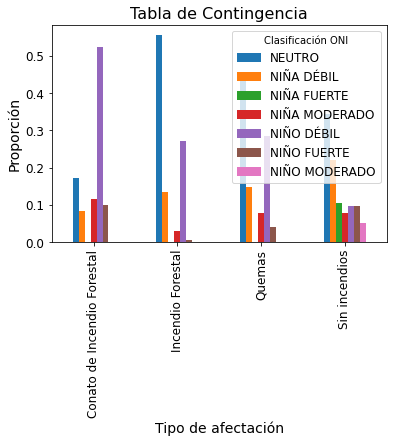

In [43]:
# Graficar la tabla de contingencia
plt.figure(figsize=(16, 12))  # Tamaño de la figura
contingency_table1.plot(kind='bar')
plt.title('Tabla de Contingencia', fontsize=16)  # Título con tamaño de fuente
plt.xlabel('Tipo de afectación', fontsize=14)  # Etiqueta del eje x con tamaño de fuente
plt.ylabel('Proporción', fontsize=14)  # Etiqueta del eje y con tamaño de fuente
plt.xticks(rotation=0, fontsize=12)  # Tamaño de fuente para los ticks del eje x y sin rotación
plt.yticks(fontsize=12)  # Tamaño de fuente para los ticks del eje y
plt.xticks(rotation=90) 
plt.legend(title='Clasificación ONI', fontsize=12)  # Tamaño de fuente para la leyenda
plt.show()

In [44]:
# Crear la tabla de contingencia excluyendo los datos nulos
contingency_table2 = pd.crosstab(merged_df['Tipo de afectación'], merged_df['ENOS C'], dropna=True, normalize='index')

contingency_table2

ENOS C,Neutro,Niña,Niño
Tipo de afectación,,,
Conato de Incendio Forestal,0.273743,0.201117,0.525140
Incendio Forestal,0.561845,0.165618,0.272537
Quemas,0.486965,0.228735,0.284301
Sin incendios,0.389381,0.362832,0.247788


<Figure size 1152x864 with 0 Axes>

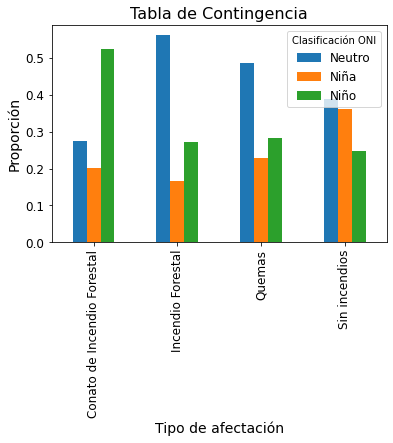

In [45]:
# Graficar la tabla de contingencia
plt.figure(figsize=(16, 12))  # Tamaño de la figura
contingency_table2.plot(kind='bar')
plt.title('Tabla de Contingencia', fontsize=16)  # Título con tamaño de fuente
plt.xlabel('Tipo de afectación', fontsize=14)  # Etiqueta del eje x con tamaño de fuente
plt.ylabel('Proporción', fontsize=14)  # Etiqueta del eje y con tamaño de fuente
plt.xticks(rotation=0, fontsize=12)  # Tamaño de fuente para los ticks del eje x y sin rotación
plt.yticks(fontsize=12)  # Tamaño de fuente para los ticks del eje y
plt.xticks(rotation=90) 
plt.legend(title='Clasificación ONI', fontsize=12)  # Tamaño de fuente para la leyenda
plt.show()

In [46]:
# Crear la tabla de contingencia excluyendo los datos nulos
contingency_table3 = pd.crosstab(merged_df['Tipo de afectación'], merged_df['Temporada *'], dropna=True, normalize='index')

contingency_table3

Temporada *,Lluvioso,Menos lluvioso
Tipo de afectación,,
Conato de Incendio Forestal,0.435754,0.564246
Incendio Forestal,0.599581,0.400419
Quemas,0.482969,0.517031
Sin incendios,0.610619,0.389381


<Figure size 1152x864 with 0 Axes>

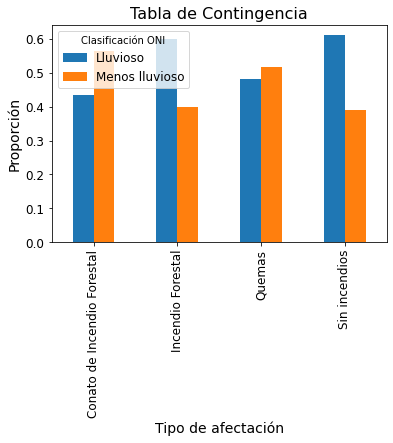

In [47]:
# Graficar la tabla de contingencia
plt.figure(figsize=(16, 12))  # Tamaño de la figura
contingency_table3.plot(kind='bar')
plt.title('Tabla de Contingencia', fontsize=16)  # Título con tamaño de fuente
plt.xlabel('Tipo de afectación', fontsize=14)  # Etiqueta del eje x con tamaño de fuente
plt.ylabel('Proporción', fontsize=14)  # Etiqueta del eje y con tamaño de fuente
plt.xticks(rotation=0, fontsize=12)  # Tamaño de fuente para los ticks del eje x y sin rotación
plt.yticks(fontsize=12)  # Tamaño de fuente para los ticks del eje y
plt.xticks(rotation=90) 
plt.legend(title='Clasificación ONI', fontsize=12)  # Tamaño de fuente para la leyenda
plt.show()

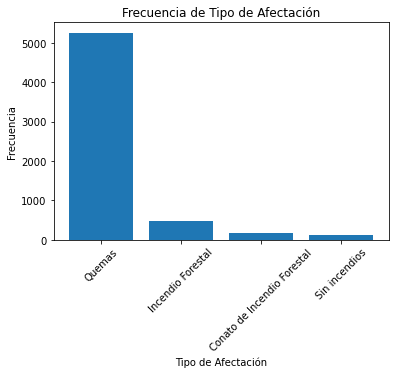

In [48]:
# Contar la frecuencia de cada tipo de afectación
frecuencia_tipo_afectacion = merged_df['Tipo de afectación'].value_counts()

# Obtener los valores y etiquetas para el gráfico de barras
valores = frecuencia_tipo_afectacion.values
etiquetas = frecuencia_tipo_afectacion.index

# Crear el gráfico de barras
plt.bar(x=etiquetas, height=valores)

# Configuración del gráfico
plt.title('Frecuencia de Tipo de Afectación')
plt.xlabel('Tipo de Afectación')
plt.ylabel('Frecuencia')

# Rotar las etiquetas del eje x para una mejor visualización si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

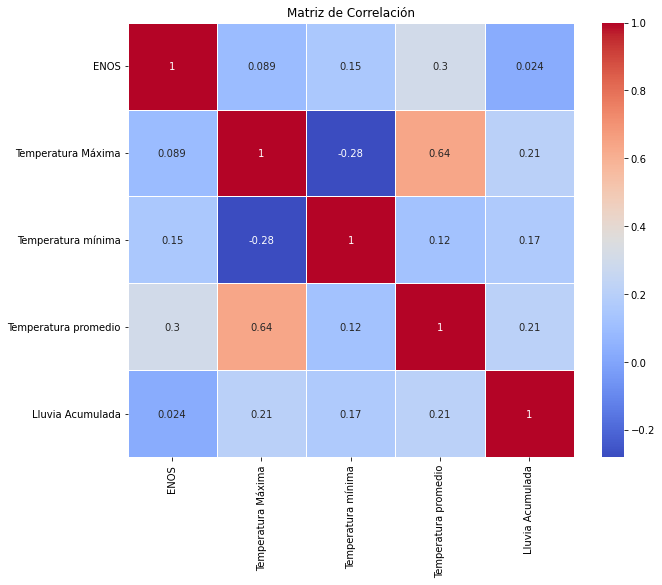

In [49]:
numeric_df = merged_df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [50]:
merged_quemas = merged_df[(merged_df['Tipo de afectación'] == 'Quemas') | (merged_df['Tipo de afectación'] == 'Sin incendios')]
merged_forestales = merged_df[merged_df['Tipo de afectación']!='Quemas']

In [51]:
# Crear una instancia de LabelEncoder
encoder = LabelEncoder()

# Ajustar el encoder a las categorías y transformarlas en números
categorias_codificadas = encoder.fit_transform(merged_quemas['Tipo de afectación'])

# Asignar los valores codificados al DataFrame original
merged_quemas.loc[:, 'categorias_codificadas'] = categorias_codificadas

C:\Users\davbu\AppData\Local\Temp\ipykernel_3568\559040669.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_quemas.loc[:, 'categorias_codificadas'] = categorias_codificadas


In [52]:
merged_quemas

,Fecha reporte,Localidad,Barrio,Upz,Dirección,Tipo de afectación,Mes_x,Mes_y,Fecha,ENOS C,ENOS,Temperatura Máxima,Temperatura mínima,Temperatura promedio,Lluvia Acumulada,Temporada *,Clasificación ONI,categorias_codificadas
0,2017-01-01,10 Engativa,LOS CEREZOS,29 - MINUTO DE DIOS,KR 89A 93 32,Quemas,2017-01-01,Ene,2017-01-01,Neutro,-0.3,24.4,2.2,14.06,427.0,Menos lluvioso,NEUTRO,0
1,2017-01-01,12 Barrios Unidos,POLO CLUB,98 - LOS ALCAZARES,CL 80 29,Quemas,2017-01-01,Ene,2017-01-01,Neutro,-0.3,24.4,2.2,14.06,427.0,Menos lluvioso,NEUTRO,0
2,2017-01-01,12 Barrios Unidos,SANTA SOFIA,98 - LOS ALCAZARES,CL 79 29B,Quemas,2017-01-01,Ene,2017-01-01,Neutro,-0.3,24.4,2.2,14.06,427.0,Menos lluvioso,NEUTRO,0
3,2017-01-01,9 FontibÃ³n,CENTENARIO,75 - FONTIBON,KR 100 16A 16,Quemas,2017-01-01,Ene,2017-01-01,Neutro,-0.3,24.4,2.2,14.06,427.0,Menos lluvioso,NEUTRO,0
4,2017-01-01,18 Rafael Uribe Uribe,GUSTAVO RESTREPO,36 - SAN JOSE,KR 13A 30 SUR 15,Quemas,2017-01-01,Ene,2017-01-01,Neutro,-0.3,24.4,2.2,14.06,427.0,Menos lluvioso,NEUTRO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11336,NaT,NaN,NaN,NaN,NaN,Sin incendios,NaT,Feb,2023-02-01,Neutro,-0.4,27.3,2.0,14.80,531.6,Menos lluvioso,NIÑA DÉBIL,1
11337,NaT,NaN,NaN,NaN,NaN,Sin incendios,NaT,Mar,2023-03-01,Neutro,-0.1,26.3,7.0,15.00,1573.4,Lluvioso,NIÑA DÉBIL,1
11338,NaT,NaN,NaN,NaN,NaN,Sin incendios,NaT,Abr,2023-04-01,Neutro,0.2,26.1,6.7,15.20,1154.8,Lluvioso,NIÑA DÉBIL,1
11339,NaT,NaN,NaN,NaN,NaN,Sin incendios,NaT,May,2023-05-01,Neutro,0.5,27.8,6.8,15.80,1159.6,Lluvioso,NIÑA DÉBIL,1


In [53]:
encoder2 = LabelEncoder()

# Ajustar el encoder a las categorías y transformarlas en números
categorias_codificadas2 = encoder.fit_transform(merged_forestales['Tipo de afectación'])

# Asignar los valores codificados al DataFrame original
merged_forestales.loc[:, 'categorias_codificadas'] = categorias_codificadas2

C:\Users\davbu\AppData\Local\Temp\ipykernel_3568\1223000294.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_forestales.loc[:, 'categorias_codificadas'] = categorias_codificadas2


In [54]:
merged_forestales.groupby('Tipo de afectación').count()

,Fecha reporte,Localidad,Barrio,Upz,Dirección,Mes_x,Mes_y,Fecha,ENOS C,ENOS,Temperatura Máxima,Temperatura mínima,Temperatura promedio,Lluvia Acumulada,Temporada *,Clasificación ONI,categorias_codificadas
Tipo de afectación,,,,,,,,,,,,,,,,,
Conato de Incendio Forestal,179,176,166,116,173,179,179,179,179,179,179,179,179,179,179,179,179
Incendio Forestal,477,346,400,311,474,477,477,477,477,477,477,477,477,477,477,477,477
Sin incendios,0,0,0,0,0,0,113,113,113,113,113,113,113,113,113,113,113


# Aprendizaje supervisado

## Modelo de predicción de quemas

### Sobremuestreo y submuestreo

In [55]:
quemas = merged_quemas[merged_quemas['Tipo de afectación'] == 'Quemas']
sin_quemas = merged_quemas[merged_quemas['Tipo de afectación'] == 'Sin incendios']

sobre_muestreo_sin_quemas = sin_quemas.sample(n=500, replace=True)
sub_muestreo_quemas = quemas.sample(n=2000, replace=False)

desbalanceado_q = merged_quemas
sobremuestreo_q = pd.concat([quemas, sobre_muestreo_sin_quemas])
submuestreo_q = pd.concat([sub_muestreo_quemas, sin_quemas])
balanceada_q = pd.concat([sobre_muestreo_sin_quemas, sub_muestreo_quemas])

balanceada_q.groupby('Tipo de afectación').count()

,Fecha reporte,Localidad,Barrio,Upz,Dirección,Mes_x,Mes_y,Fecha,ENOS C,ENOS,Temperatura Máxima,Temperatura mínima,Temperatura promedio,Lluvia Acumulada,Temporada *,Clasificación ONI,categorias_codificadas
Tipo de afectación,,,,,,,,,,,,,,,,,
Quemas,2000,1838,1819,1430,1777,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
Sin incendios,0,0,0,0,0,0,500,500,500,500,500,500,500,500,500,500,500


## Red Neuronal, Quemas

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [57]:
numeric_quemas = balanceada_q.select_dtypes(include=['number'])

In [58]:
X_q = numeric_quemas.drop('categorias_codificadas', axis=1)
y_q = balanceada_q['categorias_codificadas']

In [59]:
# Split the data into training and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X_q, y_q, stratify=y_q, shuffle = True, test_size=0.2, random_state=123)

In [60]:
# Standardize the data
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [61]:
model = Sequential([
    Input(shape=(X1_train_scaled.shape[1],)),  # Specify the input shape
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])   

In [62]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [63]:
# Train the model with scaled data
history = model.fit(X1_train_scaled, y1_train, epochs=40,batch_size=32, validation_split=0.2)

Epoch 1/40


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7380 - loss: 0.5732 - val_accuracy: 0.7850 - val_loss: 0.4791
Epoch 2/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8128 - loss: 0.4493 - val_accuracy: 0.8075 - val_loss: 0.4389
Epoch 3/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.8293 - loss: 0.4075 - val_accuracy: 0.8300 - val_loss: 0.4048
Epoch 4/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8423 - loss: 0.3845 - val_accuracy: 0.8400 - val_loss: 0.3806
Epoch 5/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8685 - loss: 0.3423 - val_accuracy: 0.8550 - val_loss: 0.3659
Epoch 6/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8567 - loss: 0.3782 - val_accuracy: 0.8475 - val_loss: 0.3495
Epoch 7/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8755 - loss: 0.3198 - val_accuracy: 0.8650 - val_loss: 0.3408
Epoch 8/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8624 - loss: 0.3327 - val_accuracy: 0.8700 - val_loss: 0.3258


In [64]:
# Evaluate the model with scaled data
loss, accuracy = model.evaluate(X1_test_scaled, y1_test)
print(f'Test Accuracy with scaled data: {accuracy:.2f}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.9050 - loss: 0.2552
Test Accuracy with scaled data: 0.91


In [65]:
predictions1 = model.predict(X1_test_scaled)
prediction_label = np.round(predictions1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


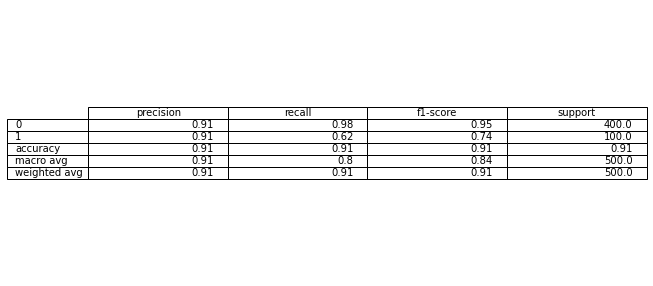

In [66]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y1_test, prediction_label, output_dict=True)

# Create a DataFrame from the classification report
df_report = pd.DataFrame(report).transpose().round(2)

# Plot the DataFrame as a table using Matplotlib

plt.figure(figsize=(10, 5))
plt.table(cellText=df_report.values,
          colLabels=df_report.columns,
          rowLabels=df_report.index,
          loc='center')
plt.axis('off')  # Turn off axis
plt.show()

## Modelo de predicción de incendios forestales

### Sobremuestreo y submuestreo

In [67]:
conato_forestal = merged_forestales[merged_forestales['Tipo de afectación'] == 'Conato de Incendio Forestal']
sin_incendios = merged_forestales[merged_forestales['Tipo de afectación'] == 'Sin incendios']
forestal = merged_forestales[merged_forestales['Tipo de afectación'] == 'Incendio Forestal']

sobre_muestreo_conato_forestal = conato_forestal.sample(n=300, replace=True)
sobre_muestreo_sin_incendios = sin_incendios.sample(n=300, replace=True)

balanceada_f = pd.concat([sobre_muestreo_conato_forestal, sobre_muestreo_sin_incendios , forestal])

balanceada_f.groupby('Tipo de afectación').count()

,Fecha reporte,Localidad,Barrio,Upz,Dirección,Mes_x,Mes_y,Fecha,ENOS C,ENOS,Temperatura Máxima,Temperatura mínima,Temperatura promedio,Lluvia Acumulada,Temporada *,Clasificación ONI,categorias_codificadas
Tipo de afectación,,,,,,,,,,,,,,,,,
Conato de Incendio Forestal,300,296,279,196,288,300,300,300,300,300,300,300,300,300,300,300,300
Incendio Forestal,477,346,400,311,474,477,477,477,477,477,477,477,477,477,477,477,477
Sin incendios,0,0,0,0,0,0,300,300,300,300,300,300,300,300,300,300,300


## Red Neuronal, Incendios forestales

In [68]:
numeric_forestales = balanceada_f.select_dtypes(include=['number'])

In [69]:
X_f = numeric_forestales.drop('categorias_codificadas', axis=1)
y_f = balanceada_f['categorias_codificadas']

In [70]:
# Convert labels to categorical one-hot encoding
y_f = to_categorical(y_f)
y_f

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [71]:
# Split the data into training and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X_f, y_f, shuffle = True, stratify=y_f, test_size=0.2, random_state=42)

In [72]:
# Standardize the data
scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

In [73]:
# Define the model using Input layer
model2 = Sequential([
    Input(shape=(X2_train_scaled.shape[1],)),  # Specify the input shape
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(y_f.shape[1], activation='softmax')  # Corrected output layer
])

In [74]:
# Compile the model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
# Train the model with scaled data
history = model2.fit(X2_train_scaled, y2_train, epochs = 80, batch_size=32, validation_split=0.2)

Epoch 1/80


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3999 - loss: 1.0576 - val_accuracy: 0.5549 - val_loss: 0.9357
Epoch 2/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6575 - loss: 0.8736 - val_accuracy: 0.6185 - val_loss: 0.8520
Epoch 3/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6620 - loss: 0.7845 - val_accuracy: 0.6416 - val_loss: 0.8051
Epoch 4/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6941 - loss: 0.7320 - val_accuracy: 0.6994 - val_loss: 0.7734
Epoch 5/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7317 - loss: 0.6966 - val_accuracy: 0.6705 - val_loss: 0.7393
Epoch 6/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7149 - loss: 0.6698 - val_accuracy: 0.6821 - val_loss: 0.7265
Epoch 7/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7165 - loss: 0.6541 - val_accuracy: 0.6994 - val_loss: 0.6939
Epoch 8/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7446 - loss: 0.6164 - val_accuracy: 0.6994 - val_loss: 0.6810
Epo

In [76]:
# Evaluate the model with scaled data
loss2, accuracy2 = model2.evaluate(X2_test_scaled, y2_test)
print(f'Test Accuracy with scaled data: {accuracy2:.2f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.8628 - loss: 0.3161
Test Accuracy with scaled data: 0.86


In [77]:
# Use the trained model to make predictions on the test data
predictions2 = model2.predict(X2_test_scaled)
predicted_labels_one_hot2 = to_categorical(np.argmax(predictions2, axis=1), num_classes=3)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


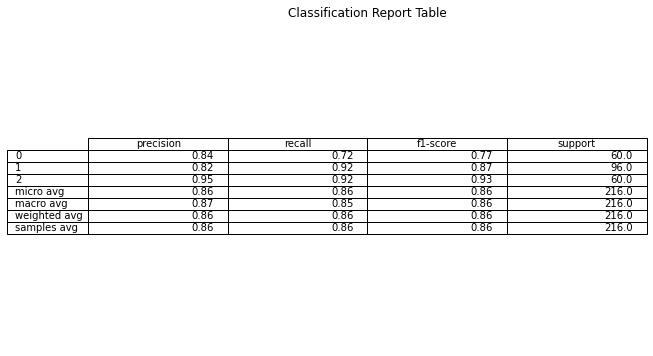

In [78]:
# Generate classification report with zero_division parameter set to 1
report2 = classification_report(y2_test, predicted_labels_one_hot2, output_dict=True)

# Create a DataFrame from the parsed data
df_classification_report = pd.DataFrame(report2)

# Round the values in the DataFrame to two decimals
df_classification_report = df_classification_report.transpose().round(2)

# Draw a table
plt.figure(figsize=(10, 6))
plt.table(cellText=df_classification_report.values,
          colLabels=df_classification_report.columns,
          rowLabels=df_classification_report.index,
          loc='center')
plt.title('Classification Report Table')
plt.axis('off')  # Hide axis
plt.show()

# Usuario

In [79]:
balanceada_q

,Fecha reporte,Localidad,Barrio,Upz,Dirección,Tipo de afectación,Mes_x,Mes_y,Fecha,ENOS C,ENOS,Temperatura Máxima,Temperatura mínima,Temperatura promedio,Lluvia Acumulada,Temporada *,Clasificación ONI,categorias_codificadas
11299,NaT,NaN,NaN,NaN,NaN,Sin incendios,NaT,Dic,2014-12-01,Niño,0.7,24.4,4.0,13.97,1101.5,Lluvioso,NIÑO DÉBIL,1
11261,NaT,NaN,NaN,NaN,NaN,Sin incendios,NaT,Oct,2011-10-01,Niña,-1.1,23.4,5.3,13.80,1380.3,Lluvioso,NIÑA MODERADO,1
11251,NaT,NaN,NaN,NaN,NaN,Sin incendios,NaT,Dic,2010-12-01,Niña,-1.6,24.5,5.0,13.72,1084.8,Lluvioso,NIÑA FUERTE,1
11251,NaT,NaN,NaN,NaN,NaN,Sin incendios,NaT,Dic,2010-12-01,Niña,-1.6,24.5,5.0,13.72,1084.8,Lluvioso,NIÑA FUERTE,1
11258,NaT,NaN,NaN,NaN,NaN,Sin incendios,NaT,Jul,2011-07-01,Niña,-0.5,22.4,5.6,13.93,445.4,Menos lluvioso,NIÑA DÉBIL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,2020-04-11,18 Rafael Uribe Uribe,BOSQUE LOS MOLOINOS,55 - DIANA TURBAY,CL 48X SUR 5F 6,Quemas,2020-04-01,Abr,2020-04-01,Neutro,0.3,26.4,4.8,15.64,736.1,Menos lluvioso,NEUTRO,0
5106,2018-09-22,1 Usaquen,ESTRELLA DEL NORTE,NaN,AUTOPISTA NORTE 160,Quemas,2018-09-01,Sep,2018-09-01,Neutro,0.4,24.8,5.3,14.52,282.9,Menos lluvioso,NEUTRO,0
5738,2018-12-17,19 Ciudad Bolivar,VILLA GLORIA,NaN,CL 69 SUR VILLA GLORIA,Quemas,2018-12-01,Dic,2018-12-01,Niño,0.8,25.8,3.6,14.34,19.9,Menos lluvioso,NIÑO DÉBIL,0
6149,2019-01-26,8 Kennedy,CAMPO ALEGRE,78 - TINTAL NORTE,CL 8 94,Quemas,2019-01-01,Ene,2019-01-01,Niño,0.8,25.6,3.9,14.63,169.4,Menos lluvioso,NIÑO DÉBIL,0


In [80]:
# Nuevos inputs que deseas probar
X_new1 = np.array([[-0.4, 25.1, 2.5, 14.5, 79.2]])  # Hacer una matriz 2D

# Estandarizar los nuevos inputs utilizando la misma función de estandarización
X_new1_standardized = scaler.transform(X_new1)

c:\Users\davbu\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [81]:
prediccion = model.predict(X_new1_standardized)
prediccion

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[0.6556426]], dtype=float32)

In [82]:
balanceada_f

,Fecha reporte,Localidad,Barrio,Upz,Dirección,Tipo de afectación,Mes_x,Mes_y,Fecha,ENOS C,ENOS,Temperatura Máxima,Temperatura mínima,Temperatura promedio,Lluvia Acumulada,Temporada *,Clasificación ONI,categorias_codificadas
2939,2017-10-17,9 FontibÃ³n,EL TINTAL A.S.D.,112 - GRANJAS DE TECHO,KR 86C 22,Conato de Incendio Forestal,2017-10-01,Oct,2017-10-01,Niña,-0.7,27.0,5.4,14.41,669.1,Lluvioso,NIÑA DÉBIL,0
10041,2021-02-05,5 Usme,A.S.D.,51 - LOS LIBERTADORES,DG 71 SUR 20 ESTE 00,Conato de Incendio Forestal,2021-02-01,Feb,2021-02-01,Niña,-0.9,26.8,4.0,15.18,549.1,Menos lluvioso,NIÑA DÉBIL,0
8914,2020-03-31,18 Rafael Uribe Uribe,LAS LOMAS,53 - MARCO FIDEL SUAREZ,CL 36D SUR 11A 37,Conato de Incendio Forestal,2020-03-01,Mar,2020-03-01,Niño,0.5,28.0,5.8,15.84,927.6,Lluvioso,NIÑO DÉBIL,0
11210,2022-01-23,5 Usme,TENERIFE II,57 - GRAN YOMASA,CL 84 SUR 14C 51,Conato de Incendio Forestal,2022-01-01,Ene,2022-01-01,Niña,-1.0,26.4,3.5,14.94,233.6,Lluvioso,NIÑA MODERADO,0
7160,2019-04-27,5 Usme,NaN,NaN,CL 137 SUR 15,Conato de Incendio Forestal,2019-04-01,Abr,2019-04-01,Niño,0.7,26.2,8.0,15.43,1240.6,Lluvioso,NIÑO DÉBIL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11206,2022-01-20,5 Usme,ARRAYANES,56 - DANUBIO,CL 64 SUR 5 28 ESTE,Incendio Forestal,2022-01-01,Ene,2022-01-01,Niña,-1.0,26.4,3.5,14.94,233.6,Lluvioso,NIÑA MODERADO,1
11213,2022-01-25,5 Usme,SAN JOSE DE USME,57 - GRAN YOMASA,KR 9 71G SUR 25,Incendio Forestal,2022-01-01,Ene,2022-01-01,Niña,-1.0,26.4,3.5,14.94,233.6,Lluvioso,NIÑA MODERADO,1
11221,2022-01-29,20 Sumapaz,SUMAPAZ,NaN,HOYA DEL GALLO SECTOR CAJAMARCA,Incendio Forestal,2022-01-01,Ene,2022-01-01,Niña,-1.0,26.4,3.5,14.94,233.6,Lluvioso,NIÑA MODERADO,1
11222,2022-01-29,5 Usme,EL PORVENIR,NaN,KM 2+300 VÍA AL LLANO,Incendio Forestal,2022-01-01,Ene,2022-01-01,Niña,-1.0,26.4,3.5,14.94,233.6,Lluvioso,NIÑA MODERADO,1


In [83]:
# Nuevos inputs que deseas probar
X_new2 = np.array([[0.5, 28.0,	5.8,	15.8,	927.6]])  # Hacer una matriz 2D

# Estandarizar los nuevos inputs utilizando la misma función de estandarización
X_new2_standardized = scaler.transform(X_new2)

c:\Users\davbu\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [84]:
prediccion = model2.predict(X_new2_standardized)
prediccion

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[0.96769583, 0.00222229, 0.03008183]], dtype=float32)

# Aprendizaje no supervisado

In [85]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Estandarizar los datos
scaler = StandardScaler()
numeric_df_scaled = scaler.fit_transform(numeric_df)

In [86]:
numeric_df_scaled

array([[-0.47936614, -0.86064612, -1.774869  , -1.42116576, -0.4847893 ],
       [-0.47936614, -0.86064612, -1.774869  , -1.42116576, -0.4847893 ],
       [-0.47936614, -0.86064612, -1.774869  , -1.42116576, -0.4847893 ],
       ...,
       [ 0.31807715,  0.15112089,  1.06339694,  1.01478395,  1.32833856],
       [ 0.79654312,  1.1628879 ,  1.12646951,  2.29686275,  1.34029653],
       [ 1.27500909, -0.14645764,  0.87417921,  1.44214355, -0.7453735 ]])

## Clustering, k-means

In [87]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

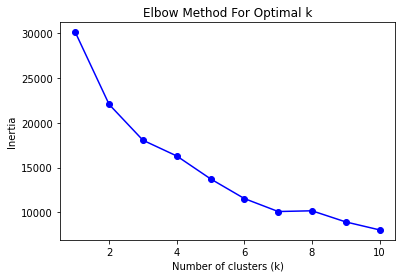

In [88]:
# Elbow method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numeric_df_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow plot
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

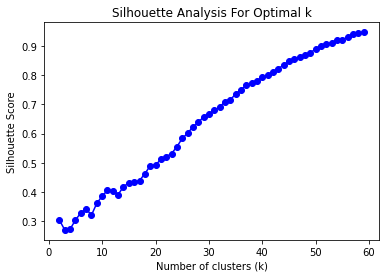

In [89]:
from sklearn.metrics import silhouette_score

# Silhouette analysis to find the optimal number of clusters
silhouette_avg = []
k_range = range(2, 60)  # Silhouette score is not defined for k=1
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(numeric_df_scaled)
    silhouette_avg.append(silhouette_score(numeric_df_scaled, clusters))

# Plotting the silhouette scores
plt.plot(k_range, silhouette_avg, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()

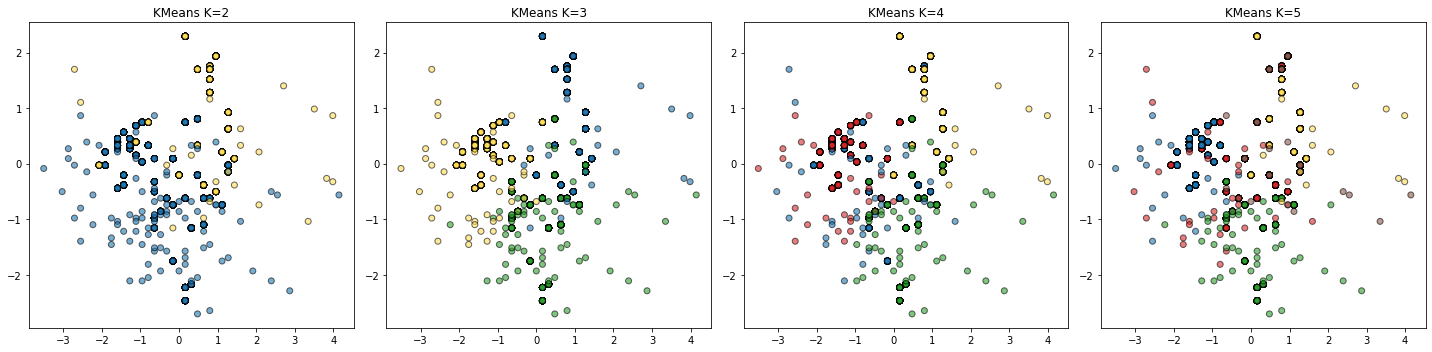

In [90]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Supongo que numeric_df_scaled es tu DataFrame ya escalado
# numeric_df_scaled = ...

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

# Definir paleta de colores personalizada con colores contrastantes
colors2 = ['#1f77b4', '#ffdd57']  # Azul y amarillo para K=2
colors3 = ['#1f77b4', '#ffdd57', '#2ca02c']  # Azul, amarillo y verde para K=3
colors4 = ['#1f77b4', '#ffdd57', '#2ca02c', '#d62728']  # Azul, amarillo, verde y rojo para K=4
colors5 = ['#1f77b4', '#ffdd57', '#2ca02c', '#d62728', '#8c564b']  # Azul, amarillo, verde, rojo, marrón para K=5

# KMeans con K=2
y_predict2 = KMeans(n_clusters=2, n_init=25, random_state=123).fit_predict(X=numeric_df_scaled)
ax[0].scatter(
        x=numeric_df_scaled[:, 0],
        y=numeric_df_scaled[:, 1],
        c=[colors2[label] for label in y_predict2],
        marker='o',
        edgecolor='black',
        alpha=0.6  # Transparencia
    )
ax[0].set_title('KMeans K=2')

# KMeans con K=3
y_predict3 = KMeans(n_clusters=3, n_init=25, random_state=123).fit_predict(X=numeric_df_scaled)
ax[1].scatter(
        x=numeric_df_scaled[:, 0],
        y=numeric_df_scaled[:, 1],
        c=[colors3[label] for label in y_predict3],
        marker='o',
        edgecolor='black',
        alpha=0.6  # Transparencia
    )
ax[1].set_title('KMeans K=3')

# KMeans con K=4
y_predict4 = KMeans(n_clusters=4, n_init=25, random_state=123).fit_predict(X=numeric_df_scaled)
ax[2].scatter(
        x=numeric_df_scaled[:, 0],
        y=numeric_df_scaled[:, 1],
        c=[colors4[label] for label in y_predict4],
        marker='o',
        edgecolor='black',
        alpha=0.6  # Transparencia
    )
ax[2].set_title('KMeans K=4')

# KMeans con K=5
y_predict5 = KMeans(n_clusters=5, n_init=25, random_state=123).fit_predict(X=numeric_df_scaled)
ax[3].scatter(
        x=numeric_df_scaled[:, 0],
        y=numeric_df_scaled[:, 1],
        c=[colors5[label] for label in y_predict5],
        marker='o',
        edgecolor='black',
        alpha=0.6  # Transparencia
    )
ax[3].set_title('KMeans K=5')

plt.tight_layout()
plt.show()


In [91]:
y_predict4

array([3, 3, 3, ..., 0, 1, 1])

In [92]:
ResultKmeans= pd.DataFrame(y_predict4)
ResultKmeans.rename(columns={0:"Cluster"},inplace=True)
ResultKmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6024 entries, 0 to 6023
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Cluster  6024 non-null   int32
dtypes: int32(1)
memory usage: 23.7 KB


In [93]:
merged_df_all = pd.concat([merged_df,ResultKmeans],axis=1)
merged_df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9075 entries, 0 to 6012
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Fecha reporte         5911 non-null   datetime64[ns]
 1   Localidad             5357 non-null   object        
 2   Barrio                5379 non-null   object        
 3   Upz                   4214 non-null   object        
 4   Dirección             5343 non-null   object        
 5   Tipo de afectación    6024 non-null   object        
 6   Mes_x                 5911 non-null   datetime64[ns]
 7   Mes_y                 6024 non-null   object        
 8   Fecha                 6024 non-null   datetime64[ns]
 9   ENOS C                6024 non-null   object        
 10  ENOS                  6024 non-null   float64       
 11  Temperatura Máxima    6024 non-null   float64       
 12  Temperatura mínima    6024 non-null   float64       
 13  Temperatura promed

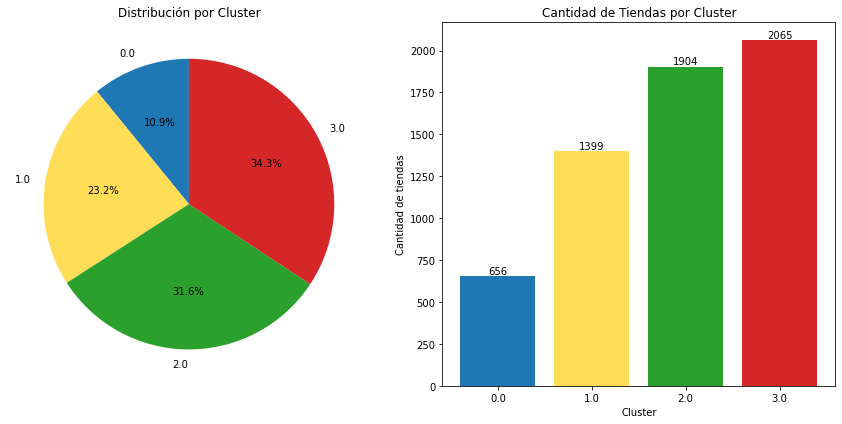

In [94]:
element_counts = merged_df_all["Cluster"].value_counts()

import matplotlib.pyplot as plt

# Definir paleta de colores personalizada
colors = ['#1f77b4', '#ffdd57', '#2ca02c', '#d62728', '#8c564b']  # Azul, amarillo, verde, rojo, marrón

element_counts = merged_df_all["Cluster"].value_counts().sort_index()

# Crear un mapeo explícito de clusters a colores
cluster_to_color = {cluster: colors[i] for i, cluster in enumerate(element_counts.index)}

# Crear una figura con dos subplots (uno para el gráfico circular y otro para el gráfico de barras)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Obtener la lista de colores ordenada según los clusters en element_counts
pie_colors = [cluster_to_color[cluster] for cluster in element_counts.index]

# Gráfico circular
ax1.pie(element_counts, labels=element_counts.index, autopct='%1.1f%%', startangle=90, colors=pie_colors)
ax1.set_title("Distribución por Cluster")

# Gráfico de barras
ax2.bar(element_counts.index, element_counts.values, color=pie_colors)
ax2.set_xlabel("Cluster")
ax2.set_ylabel("Cantidad de tiendas")
ax2.set_title("Cantidad de Tiendas por Cluster")

# Ajustar los valores en el eje x del gráfico de barras
ax2.set_xticks(range(len(element_counts)))
ax2.set_xticklabels(element_counts.index)

# Agregar etiquetas con los valores en las barras
for i, v in enumerate(element_counts.values):
    ax2.text(i, v, str(v), ha="center", va="bottom")

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()



In [95]:
pd.set_option("display.float_format", lambda x: f"{x:.1f}")

Centroides = merged_df_all.groupby("Cluster")
averages = Centroides[['ENOS', 'Temperatura Máxima', 'Temperatura mínima',  'Temperatura promedio',	'Lluvia Acumulada']].mean()
averages

,ENOS,Temperatura Máxima,Temperatura mínima,Temperatura promedio,Lluvia Acumulada
Cluster,,,,,
0.0,0.1,24.9,5.1,14.4,666.3
1.0,-0.3,24.2,5.8,14.3,579.3
2.0,-0.2,25.2,5.0,14.6,707.6
3.0,0.3,24.9,4.4,14.4,512.9


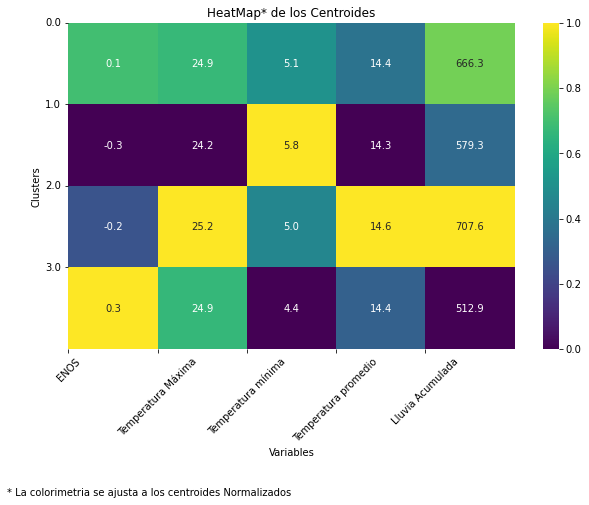

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

averages_original = Centroides[['ENOS', 'Temperatura Máxima', 'Temperatura mínima',  'Temperatura promedio',	'Lluvia Acumulada']].mean()

# Normalizar los valores de las características
scaler = MinMaxScaler()
averages_scaled = scaler.fit_transform(averages_original)

# Crear un mapa de calor con colores personalizados para cada característica
plt.figure(figsize=(10, 6))
sns.heatmap(averages_scaled, annot=averages_original, cmap="viridis", fmt=".1f")

# Personalizar las etiquetas de los ejes
feature_names = ['ENOS', 'Temperatura Máxima', 'Temperatura mínima',  'Temperatura promedio',	'Lluvia Acumulada']
plt.xticks(ticks=range(len(feature_names)), labels=feature_names, rotation=45, ha="center")
plt.yticks(ticks=range(len(averages.index)), labels=averages.index, rotation=0)

# Personalizar el gráfico (opcional)
plt.title("HeatMap* de los Centroides")
plt.xlabel("Variables")
plt.ylabel("Clusters")
plt.text(0.5, -0.45, "* La colorimetria se ajusta a los centroides Normalizados", transform=plt.gca().transAxes, ha="right")

# Mostrar el gráfico
plt.show()

# Clustering + PCA

In [97]:
# Realizar el Análisis de Componentes Principales (PCA)
pca = PCA()
pca.fit(numeric_df_scaled)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.36819305 0.25446554 0.19761279 0.13192716 0.04780146]


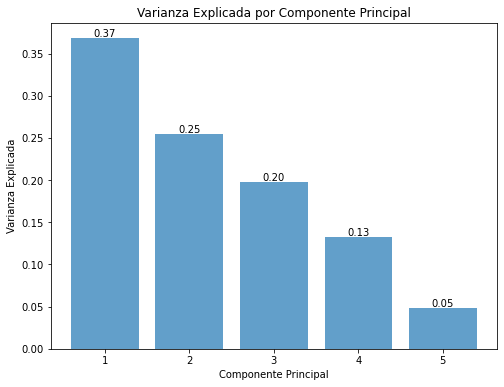

In [98]:
# Graficar la varianza explicada por cada componente
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)

# Agregar etiquetas a las barras
for i, var_exp in enumerate(explained_variance):
    plt.text(i + 1, var_exp, f"{var_exp:.2f}", ha='center', va='bottom')


plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.show()

In [99]:
# Obtener las cargas de cada variable en los componentes
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(numeric_df.columns))], index = numeric_df.columns)
print("Cargas de variables en los componentes:")
print(loadings)

Cargas de variables en los componentes:
                      PC1  PC2  PC3  PC4  PC5
ENOS                  0.3  0.4 -0.7  0.6 -0.1
Temperatura Máxima    0.6 -0.4  0.0 -0.1 -0.7
Temperatura mínima    0.0  0.8  0.1 -0.5 -0.3
Temperatura promedio  0.7  0.0 -0.1 -0.4  0.6
Lluvia Acumulada      0.3  0.3  0.7  0.5  0.1


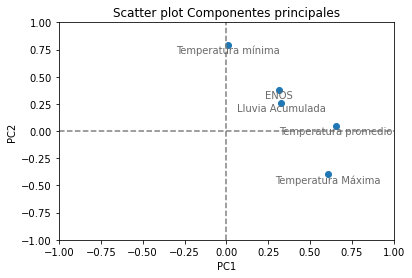

In [100]:
plt.scatter(loadings['PC1'],loadings['PC2'] )

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot Componentes principales')

# Establecer los límites de los ejes centrados en 0
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Agregar etiquetas a cada punto
for label, x, y in zip(loadings.index, loadings['PC1'], loadings['PC2']):
    plt.text(x, y, label, ha='center', va='top', color = 'dimgray')

# Agregar líneas punteadas en y = 0 y x = 0
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# Mostrar el gráfico
plt.show()